## Chapter 2
# Acoustic Modeling with Digital Delay

## Comb Filter Problems

**1. Referring to [2.6.3 on page 59](https://ccrma.stanford.edu/~jos/pasp/Feedforward_Comb_Filter_Amplitude.html), analyze and plot the frequency response (both amplitude and phase responses) for the feedforward comb filter**

$y(n) = x(n) - x(n-10)$.

This is in Direct-Form I. We can find the transfer function from inspection as

$H(z) = 1 - z^{-10}$.

The amplitude response is thus

$\begin{align}
G(\omega) \triangleq \left|H(e^{j\omega})\right| &= \left|1 - e^{-10j\omega}\right|\\
&= \left|e^{\frac{-10j\omega}{2}}\left(e^{\frac{10j\omega}{2}} - e^{\frac{-10j\omega}{2}}\right)\right|\\
&= \left|e^{-5j\omega}2j\sin(5\omega)\right|\\
&= \left|2j\sin(5\omega)\right|\\
&= 2\left|\sin(5\omega)\right|,\\
\end{align}$

and the phase response is

$\begin{align}
\Theta(\omega) &\triangleq \angle H(e^{j\omega})\\
&= \angle e^{-5j\omega}2j\sin(5\omega)\\
&= \angle e^{j(-5\omega + \pi/2)}2\sin(5\omega)\\
&= -5\omega + \pi/2
\end{align}$

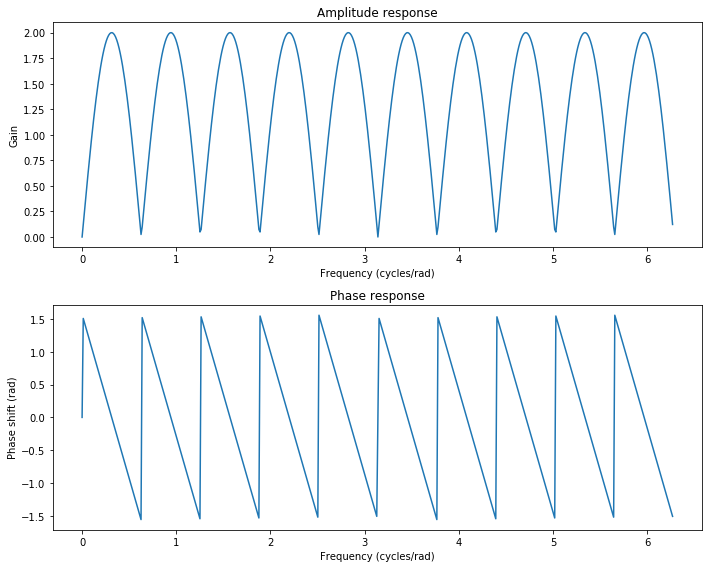

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import freqz

B = [1] + [0] * 9 + [-1]; A = [1]

w, H = freqz(B, A, whole=True)

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(w, np.abs(H))
plt.title('Amplitude response')
plt.xlabel('Frequency (cycles/rad)')
plt.ylabel('Gain')

plt.subplot(212)
plt.plot(w, np.unwrap(np.angle(H)))
plt.title('Phase response')
plt.xlabel('Frequency (cycles/rad)')
plt.ylabel('Phase shift (rad)')
plt.tight_layout()

Note that we have $M = 10$ notches, as expected.

**2. Given the difference equation for the general feedback comb filter**

$y(n) = x(n) + gy(n-M)$,

**derive the transfer function $H(z) = Y(z) / X(z)$.**

$\begin{array}{ll}
\mathcal{Z}\{y(n)\} &= \mathcal{Z}\{x(n) + gy(n-M)\}\\
&= \mathcal{Z}\{x(n)\} + g\mathcal{Z}\{y(n-M)\} &\text{ by linearity of }\mathcal{Z}\\
Y(z) &= X(z) + gz^{-M}Y(z) &\text{ by shift theorem}\\
Y(z)\left(1 - gz^{-M}\right) &= X(z)\\
H(z) \triangleq \frac{Y(z)}{X(z)} &= \frac{1}{1 - gz^{-M}}\\
\end{array}$

**3. Find the poles of the recursive comb filter**

$y(n) = x(n) + y(n-8)$.

The transfer function of this filter can be found by inspection (note the same form as the previous question) as

$H(z) = \frac{1}{1 - z^{-8}}.$

The poles will occur whenever $z^{-8} = 1 \implies z^{8} = 1$. This is the $8_{th}$ _root of unity_, so there will be zeros at $z = e^{j2\pi n/8} = e^{j\pi n/4}, n = 0, 1, ... 8$.

Let's verify:

Text(0,0.5,'Gain')

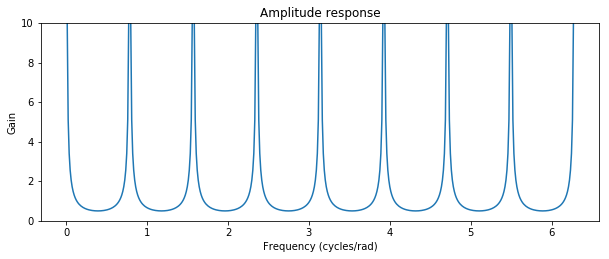

In [2]:
B = [1]; A = [1] + [0] * 7 + [-1 + np.finfo(float).eps] # avoid divide-by-zero warnings

w, H = freqz(B, A, whole=True)

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(w, np.abs(H))
plt.ylim(0, 10)
plt.title('Amplitude response')
plt.xlabel('Frequency (cycles/rad)')
plt.ylabel('Gain')

**4. Find the poles of the recursive comb filter**

$y(n) = x(n) + 0.5y(n-8)$.

Again, the transfer function can be found by inspection:

$H(z) = \frac{1}{1 - 0.5z^{-8}}$

The poles will occur whenever $z^{-8} = 2 \implies z^{8} = \frac{1}{2}$. Taking the $8_{th}$ root of both sides, $z = \frac{1}{\sqrt[8]{2}}e^{j\pi n/4}, n = 0, 1, ... 8$.

These poles are all inside the unit circle at the same radius:

In [3]:
np.abs((2 ** (-1/8) * np.exp(1j * np.pi * np.arange(9) / 4)))

array([ 0.91700404,  0.91700404,  0.91700404,  0.91700404,  0.91700404,
        0.91700404,  0.91700404,  0.91700404,  0.91700404])

**5. Plot the poles in the previous two problems on the same plot.**

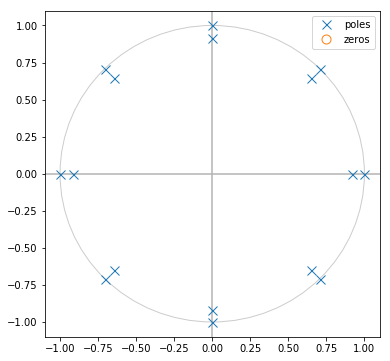

In [4]:
from scipy.signal import tf2zpk

import sys
sys.path.append('../introduction_to_digital_filters/')
from plot_utils import zplane

z1, p1, k1 = tf2zpk(B, A)

B = [1]; A = [1] + [0] * 7 + [-0.5] # avoid divide-by-zero warnings
z2,p2,k2 = tf2zpk(B, A)

plt.figure(figsize=(6, 6))
_ = zplane(np.append(z1, z2), np.append(p1, p2))

The first set of zeros is on the unit circle and the second set is just inside the unit circle at the same angles.

**6. Let $H_1(z)$ denote the transfer function of the filter in problem 3, and let $H_2(z)$ denote that for problem 4. We can express $H_2(z)$ as a conformal mapping of $H_1(z)$, viz., $H_2(z) = H_1(\alpha z)$. Find $\alpha$.**

We want

$\begin{align}
H_1(\alpha z) &= H_2(z)\\
\frac{1}{1 - \left(\alpha z\right)^{-8}} &= \frac{1}{1 - 0.5z^{-8}}\\
\left(\alpha z\right)^{-8} &= 0.5z^{-8}\\
\alpha^{-8} z^{-8} &= 0.5z^{-8}\\
\alpha^{-8} &= 0.5\\
\alpha^{8} &= 2\\
\alpha &= 2^{\frac{1}{8}}
\end{align}$

**7. Find an approximate formula for the poles of the recursive comb filter**

$y(n) = x(n) + \alpha y(n-7) + (1-2\alpha)y(n-8) + \alpha y(n-9)$

**under the assumption $G(z) = G(z/\left|z\right|)$. Your result should be exact when $\alpha = 0$. [Hint: Analyze this as $Y(z) = X(z) + G(z)z^{-8}Y(z)$ and approximate $G(z)$ near the unit circle by $G(z/\left|z\right|)$.]**

The $z$ transform $Y(z)$ is

$\begin{array}{ll}
Y(z) &= X(z) + \alpha z^{-7}Y(z) + (1 - 2\alpha)z^{-8}Y(z) + \alpha z^{-9}Y(z)\\
&= X(z) + \left[\alpha z^{-7} + (1 - 2\alpha)z^{-8} + \alpha z^{-9}\right]Y(z)\\
&= X(z) + \left[\alpha z + (1 - 2\alpha) + \alpha z^{-1}\right]z^{-8}Y(z)\\
&= X(z) + G(z)z^{-8}Y(z),\\
\end{array}$

with

$\begin{array}{ll}
G(z) &\triangleq \alpha z + (1 - 2\alpha) + \alpha z^{-1}\\
&= 1 - 2\alpha + \alpha\left(z + z^{-1}\right)\\
\end{array}$

If $G(z) = G(z/\left|z\right|)$, then $\left|z\right| \approx 1$, and so we can approximate $z$ as being near the unit circle and we can set $z = e^{j\omega k T}$. Then we have

$\begin{array}{ll}
G(z) \approx G(e^{j\omega k T}) &= 1 - 2\alpha + \alpha\left(e^{j\omega k T} + e^{-j\omega k T}\right)\\
&= 1 - 2\alpha + 2\alpha\cos(\omega k T)\\
&= 1 - 2\alpha\left(1 - \cos(\omega k T)\right) = 1 - 4\alpha\sin^2(\frac{\omega k T}{2})\\
\end{array}$


Putting all this together, we have

$\begin{align}
H(z) &= \frac{1}{1 - G(z)z^{-8}}\\
&\approx \frac{1}{1 - \left[1 - 4\alpha\sin^2(\frac{\omega k T}{2})\right]z^{-8}},\\
\end{align}$

which will have poles when $z^{8} = 1 - 4\alpha\sin^2(\frac{\omega k T}{2}) \implies z = \left|1 - 4\alpha\sin^2(\frac{\omega k T}{2})\right|^{\frac{1}{8}}e^{j\pi n/4}, n = 0, 1, ... 8$.

**8. Plot the exact and approximate poles in the previous problem on the same plot for $\alpha = 0.25$. Discuss where the approximation is good and where it is bad and why.**

After messing with some values, I think it's more interesting and instructive to make an animation of $\alpha$ ranging from 0 to 0.25:

In [56]:
from matplotlib import patches

import sys
sys.path.append('../')
from ipython_animation import create_animation, DEFAULT_FPS

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.add_patch(patches.Circle((0,0), radius=1, fill=False, color='black', ls='solid', alpha=0.2))
plt.axvline(0, color='0.7'); plt.axhline(0, color='0.7')

exact_poles_ax, = plt.plot(np.zeros(9), np.zeros(9), 'x', markersize=9, label='exact poles')
approx_poles_ax, = plt.plot(np.zeros(9), np.zeros(9), 'x', markersize=9, label='approx. poles')
_ = plt.legend()

animation_length_seconds = 4
def animate(frame):
    alpha = (frame / ((animation_length_seconds * DEFAULT_FPS) - 1)) * 0.25 # range = [0, 0.25] inclusive

    B = [1]; A = [1] + [0] * 6 + [-alpha, -(1 - 2 * alpha), -alpha]
    z,p,k = tf2zpk(B, A)

    plt.title('Approximation of poles for $\\alpha = %0.3f$' % alpha, size=14)
    angles = np.pi * np.arange(9) / 4
    p_approx = np.abs(1 - 4 * alpha * np.sin(angles / 2)) ** (1/8) * np.exp(1j * angles)

    exact_poles_ax.set_data(p.real, p.imag)
    approx_poles_ax.set_data(p_approx.real, p_approx.imag)

create_animation(fig, plt, animate, length_seconds=animation_length_seconds)

A few observations:

* As required, our approximation is _exact_ for $\alpha = 0$.
* Our approximation _assumes_ there are only 8 poles. This means the caveat to the first point is that when $\alpha = 0$, we don't account for an additional pole occurring at $0$ when $z = \infty$.
* In general, the approximation is better for smaller $\alpha$. This is because when $\alpha$ is small, the actual recursive comb filter _almost_ degenerates to an 8-pole filter with a stable dampening on the poles to pull them in from the unit circle (as the formulation of the z-transform in the hint suggests).
* When $\alpha$ is small (less than about $2.3$), the approximations of the _real, negative_ pole that starts at $p = -1$ is just about _exactly accurate_. After that point, when $\alpha \to 2.5$, the two (actual, exact) poles on the negative real axis _diverge_ into conjugate complex poles, while our approximation necessarily stays on the negative real axis.
* When $\alpha \to 2.5$, the 9 _actual_ poles disperse, but our estimate 8 poles stay at the same angles. Thus, the angles of our estimated poles are closest when $\alpha$ is close to 0.

**9. Express the impulse response of $y[n] = x[n] - y[n-3] - 0.25y[n-6]$ as a sum of $N$ exponentially decaying sinusoids. List explicitly the decay time-constant for each sinusoid.**

First, let's find the transfer function:

$H(z) = \frac{1}{1 + z^{-3} + 0.25z^{-6}}$

(TODO: The usual method of finding the PFE to find the IDFT coefficients is going to be insanely hard here. I tried to get Wolfram to help me and the result is totally unwieldy. What am I missing here?)

## Acoustic Echo Simulation Problems

**1. Assuming sound propagates at $c = 343$ meters per second (at 20 degrees Celsius), find the delay-line length $M$ which can be used to simulate sound propagation delay over a distance of approximately 10 meters (rounded to the nearest sample), where the simulation sampling rate is 44.1 kHz.**

$M = \text{round}\left[\frac{d}{cT}\right] = \text{round}\left[\frac{10m}{(343m/s)\cdot (44.1 kHz)^{-1}}\right] = 1286$ samples.

**2. Suppose that pressure-wave amplitude was observed to decay by a factor of 2 in the geometry of the previous problem. In other words, sound propagation over a distance of 10 meters is associated with 6.02 dB of loss at all frequencies. What is the loss associated with propagation over one spatial sample?**

If $g$ is the per-sample decay factor, we are given $g^M = \frac{1}{2}$. Solving for $g$, $g = \frac{1}{2}^{\frac{1}{M}} = \frac{1}{2}^{\frac{1}{1286}} \approx 0.9995$

**3. Suppose the high E string of an electric guitar vibrates at 330 Hz and is measured to be 25 inches long from nut to bridge.**

**a) Find the speed of sound for transverse traveling-waves on the string**

The string will be fibrating in its first harmonic, meaning the wavelength will be twice the length of the string, so the speed can be found with

$c = f \lambda = 2f \mathcal{l}$,

where $c$ is the speed of the traveling waves, $f$ is the fundamental frequency of the E string, $\lambda$ is the wavelength of the traveling waves, and $\mathcal{l}$ is the length of the guitar string from nut to bridge.

$c = 2f \mathcal{l} = 2\cdot (330 \text{ Hz}) \cdot (25 \text{ inches}) = 16500 \text{ in/sec} = 1375 \text{ ft/sec}$

**b) Find the spatial sampling interval at 44.1 kHz.**

The relationship between the spatial sampling interval $X \text{ ft}$, the temporal sampling rate $f_s \text{ sec}^{-1}$ and the travelling wave velocity $c \text{ ft/sec}$ is $X = \frac{c}{f_s} = \frac{1375 \text{ ft/sec}}{44100 \text{ sec}^{-1}} = 0.0311 \text{ ft} \approx 9.50 \text{ mm} \approx 1 \text{ cm}$

**4. Sketch a delay-line simulation of an acoustic point-source at $\boldsymbol{x} = (1,1,0)$ meters, a listener at $\boldsymbol{x} = (2,0,0)$, a reflecting wall at $\boldsymbol{x} = (x,2,z)$, and a second reflecting wall at $\boldsymbol{x} = (0,y,z)$. Assume the wall reflection coefficient is 1, and that air absorption is 0.1 dB per meter at all frequencies.**

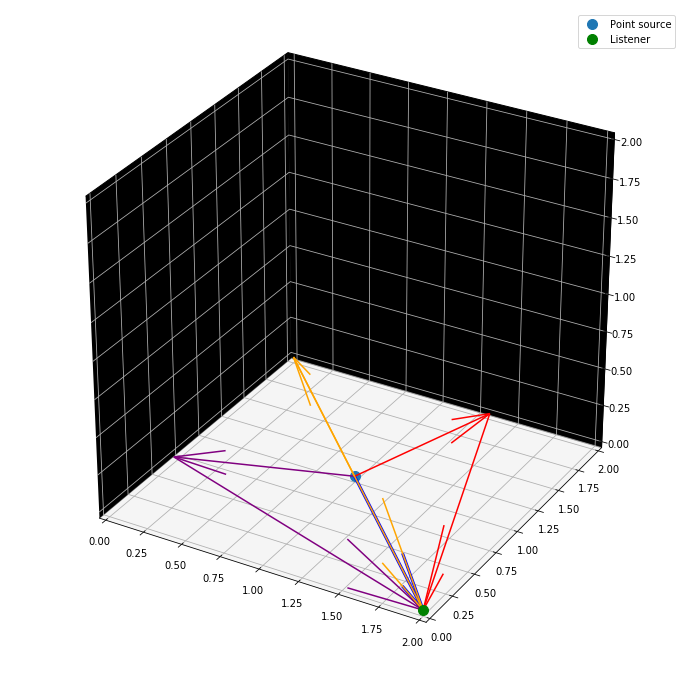

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.set_xlim(0, 2); ax.set_ylim(0, 2); ax.set_zlim(0, 2)
ax.get_xaxis().set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.get_yaxis().set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.quiver([1], [1], [0], [1], [-1], [0], color='blue', linewidth=3)
ax.quiver([1, 4/3], [1, 2], [0, 0], [1/3, 2/3], [1, -2], [0, 0], color='red')
ax.quiver([1, 0], [1, 2/3], [0, 0], [-1, 2], [-1/3, -2/3], [0, 0], color='purple')
ax.quiver([1, 0], [1, 2], [0, 0], [-1, 2], [1, -2], [0, 0], color='orange')
ax.scatter([1], [1], [0], label='Point source', s=100)
ax.scatter([2], [0], [0], label='Listener', s=100, color='green')
_ = plt.legend()

There are four paths drawn here. The blue arrow goes straight from the source to the listener, the red and purple arrows each bounce off a single wall (and are the same length), and the orange arrow bounces off the far corner and reflects back (and has three times length of the blue line).

Note that there cannot be any paths with _two_ "bounces" in this configuration. I had to draw a bit to convince myself of this and I don't offer a proof here :)


**a) Find all acoustic path lengths.**

The length of the direct (blue) path is $d_1 = \sqrt{1^2 + 1^2} = \sqrt{2}$.

The red path above will be the same length as if a continuous straight vector was drawn from the point source at $(1, 1, 0)$ to a point _beyond_ the back $y$-axis wall to $(2, 4, 0)$, where the listener would be _reflected_ about the back $y$-axis wall at $y=2$. (This is how angles of incidence work!)

Thus, the length of the red path (and the purple path) is $d_2 = d_3 = \sqrt{1 ^ 2 + 3 ^ 2} = \sqrt{10}$.

The length of the orange path (the longest path) is $d_4 = 3d_1 = 3\sqrt{2}$.

All together, the path lengths are $\boldsymbol{d} = \left[\sqrt{2}, \sqrt{10}, \sqrt{10}, 3\sqrt{2}\right]$ meters.

**b) Find all acoustic path gains.**

Attenuation will occur due to both air absorption and wave propagation (energy conservation).

We are given that the air absorption is 0.1 dB per meter at all frequencies. In terms of gain, this corresponds to $g_a = 10^{-\frac{0.1}{20}} = 10^{-0.005}$ per meter. These losses will compound for each meter of wave propagation, so the total attenuation due to air absorption is exponential:

$\boldsymbol{G_a} = g_a ^ \boldsymbol{d} = \left[10^{-0.005\sqrt{2}}, 10^{-0.005\sqrt{10}}, 10^{-0.005\sqrt{10}}, 10^{-0.015\sqrt{2}}\right]$.

The loss due to propagation will be $\frac{1}{d}$ for each path length:

$\boldsymbol{G_p} = \frac{1}{\boldsymbol{d}} = \left[\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{10}}, \frac{1}{\sqrt{10}}, \frac{1}{3\sqrt{2}}\right]$

These two types of gain will multiply together, giving total path gains of

$\boldsymbol{G} = \boldsymbol{G_a} \cdot \boldsymbol{G_p} = \left[\frac{10^{-0.005\sqrt{2}}}{\sqrt{2}}, \frac{10^{-0.005\sqrt{10}}}{\sqrt{10}}, \frac{10^{-0.005\sqrt{10}}}{\sqrt{10}}, \frac{10^{-0.015\sqrt{2}}}{3\sqrt{2}}\right]$.

There are two simplifications we can make. First, the two identical path lengths will reinforce and double in amplitude at the listener point. We can thus remove that identical delay element and double its gain:

$\boldsymbol{d} = \left[\sqrt{2}, \sqrt{10}, 3\sqrt{2}\right]$

$\boldsymbol{G} = \left[\frac{10^{-0.005\sqrt{2}}}{\sqrt{2}},2 \cdot \frac{10^{-0.005\sqrt{10}}}{\sqrt{10}}, \frac{10^{-0.015\sqrt{2}}}{3\sqrt{2}}\right]$.

Next, we can follow the book's advice and discard any _common delay_ which affects all signals equally (since this common delay will not affect timbre). In other words, we will not implement the _direct signal delay_ at all, and we will express all other delays relative to the direct signal.

$\boldsymbol{d} = \left[\sqrt{10} - \sqrt{2}, 3\sqrt{2} - \sqrt{2}\right] = \left[\sqrt{10} - \sqrt{2}, 2\sqrt{2}\right]$

$\begin{align}
\boldsymbol{G} &= \left[2\sqrt{2} \cdot \frac{10^{-0.005\sqrt{10}}}{10^{-0.005\sqrt{2}}\sqrt{10}}, \frac{10^{-0.015\sqrt{2}}\sqrt{2}}{3\cdot 10^{-0.005\sqrt{2}} \sqrt{2}}\right]\\
&= \left[2\sqrt{2} \cdot 10^{-0.005\sqrt{10} + 0.005\sqrt{2} - 0.5}, \frac{1}{3}10^{-0.015\sqrt{2} + 0.005\sqrt{2}}\right]\\
&= \left[2\sqrt{2} \cdot 10^{0.005\left(-\sqrt{10} + \sqrt{2}\right) - 0.5}, \frac{1}{3}10^{-0.010\sqrt{2}}\right]\\
&\approx \left[0.8767, 0.3227\right]\end{align}$.

**c) Assuming sound speed is $c = 343$ meters per second, and the sampling rate is 44.1 kHz, find all delay-line lengths.**

$\boldsymbol{M} = \frac{\boldsymbol{d}}{cT} =\frac{f_s}{c} \boldsymbol{d} = \frac{44100}{343}\left[\sqrt{10} - \sqrt{2}, 2\sqrt{2}\right] \approx \left[225, 364\right]$

**d) Find the transfer function from source to listener.**

The difference equation is

$y(n) = x(n) + 0.8767x(n-225) + 0.3227x(n-364)$,

corresponding to a transfer function of

$H(n) = 1 + 0.8767z^{-225} + 0.3227z^{-364}$.

**e) Using Matlab, plot the echogram (impulse response) and amplitude response (magnitude frequency response).**

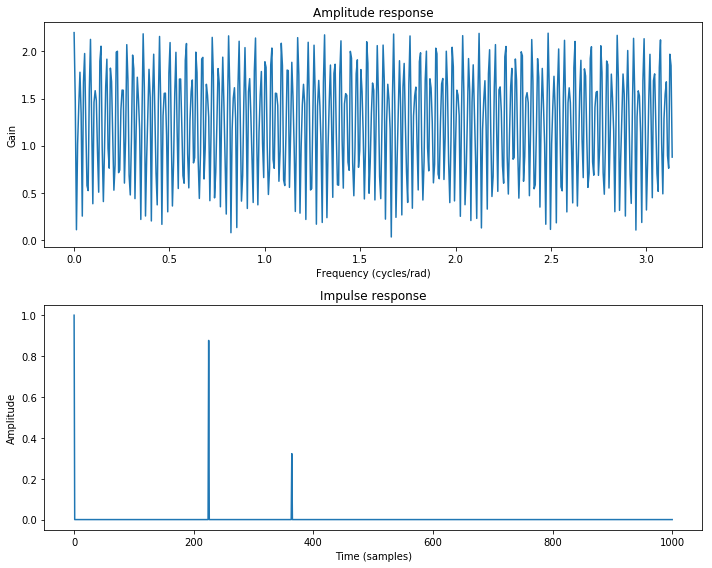

In [7]:
from scipy.signal import lfilter

B = [1] + [0] * (225 - 1) + [0.8767] + [0] * (364 - 225 - 1) + [0.3227]
A = [1]
w, H = freqz(B, A)
assert(len(B) == 365) # 1 + longest delay length

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.title('Amplitude response')
plt.xlabel('Frequency (cycles/rad)')
plt.ylabel('Gain')
plt.plot(w, np.abs(H))

plt.subplot(212)
plt.title('Impulse response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.plot(lfilter(B, A, [1.0] + [0] * 1000))
plt.tight_layout()

Let's listen to it just for fun!

In [8]:
from scipy.io.wavfile import read as wavread
from IPython.display import Audio

fs, samples = wavread('speech-male.wav')
assert(fs == 44100) # our implementation assumes exactly this sample rate.

**Original Sound**

In [9]:
Audio(samples, rate=fs)

**Sound with simulated echo**

In [10]:
Audio(lfilter(B, A, samples), rate=fs)

**5) Sketch a delay-line simulation of an acoustic _plane-wave source_ at $\boldsymbol{x} = (x,1,z)$ meters, a listener at $\boldsymbol{x} = (0,1,0)$, a reflecting wall at $\boldsymbol{x} = (x,2,z)$, and a second reflecting wall at $\boldsymbol{x} = (x,0,z)$. Assume the wall reflection coefficient is 0.9, and that air absorption is 0.01 dB per meter at all frequencies.**

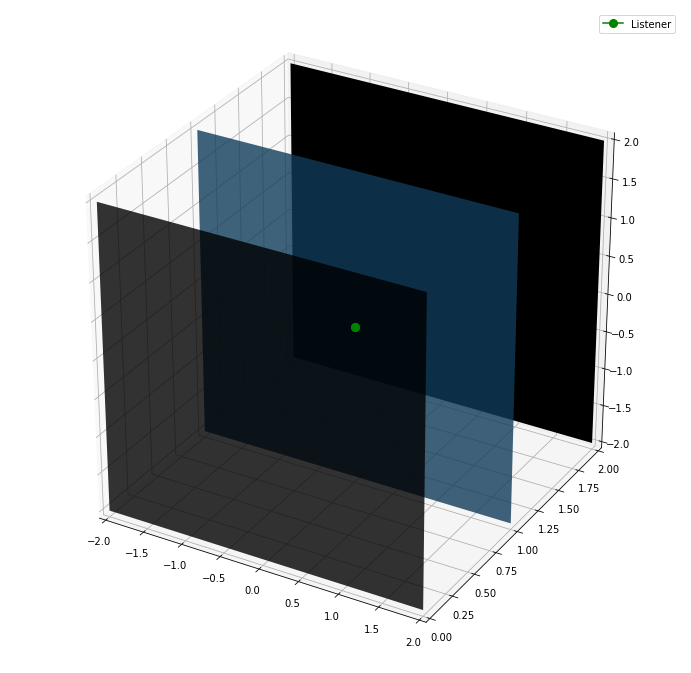

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.set_xlim(-2, 2); ax.set_ylim(0, 2); ax.set_zlim(-2, 2)

ax.plot([0,0], [1,1], [0, 0], c='green', marker='o', label='Listener', markersize=8)
# plot plane-wave source
ax.plot_surface([-2, 2], 1, np.array([[-2, -2], [2, 2]]), alpha=0.8)
# y=0 wall
ax.plot_surface([-2, 2], 0, np.array([[-2, -2], [2, 2]]), alpha=0.8, color='black')
# y=2 wall
ax.plot_surface([-2, 2], 2, np.array([[-2, -2], [2, 2]]), alpha=1, color='black')

_ = plt.legend()

**a) Find all acoustic path length.**

The green dot lying in the middle is the listener, the two black planes are the walls and the orange plane is the plane-wave source.

The listener is at position $x=0$ relative to the plane wave, so it will hear an unattenuated (${g_r}_0=1$) signal at time $nT = 0$. The wave will propagate 1 meter to one wall and $g_r=0.9$ of the amplitude will be reflected back to the listener after another 1 meter, for a total distance of $d = 2$ meters. Then the same thing will happen against the back wall and we can thus think of this as a _recursive_ (IIR) filter with a single feedback delay element.

**b) Find all acoustic path gains.**

From the book (p47), "For an ideal plane wave, there is no 'spreading loss' (attenuation by 1/$r$)." Thus, we only need to account for _air absorption_ and _wall absorption_.

As mentioned above, the wall reflection coefficient will produce a gain of $g_r=0.9$ for the single recursive delay element.

The air absorption is given as $0.01$ dB per meter. In terms of gain, this corresponds to $g_a = 10^{-\frac{0.01}{20}} = 10^{-0.0005}$ per meter. For $d=2$, this gives a total gain of $g = g_rg_a^d = 0.9\cdot10^{-0.001}$ for each reflection.

**c) Assuming sound speed is $c=343$ meters per second, and the sampling rate is 44.1 kHz, find all delay-line lengths.**

The length $M$ in samples for the single recursive delay element in this simulation can be found with

$M = \text{round}\left[\frac{f_s}{c} d \right] = \text{round}\left[\frac{44100}{343}2\right] = 257$ samples.

**d) Find the transfer function from source to listener.**

The difference equation is

$y(n) = x(n) + 0.9\cdot10^{-0.001}y(n-257)$,

corresponding to a transfer function of

$H(n) = \frac{1}{1 - 0.9\cdot10^{-0.001}z^{-257}}$.

**e) Using Matlab, plot the echogram and amplitude response.**

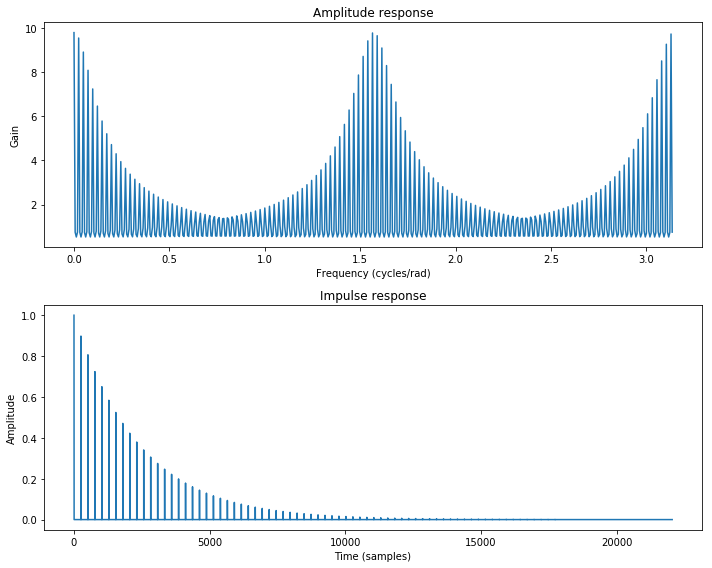

In [12]:
from scipy.signal import lfilter

B = [1]
A = [1] + [0] * (257 - 1) + [-0.9*10**-0.001]

w, H = freqz(B, A)
assert(len(A) == 258) # 1 + longest delay length

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.title('Amplitude response')
plt.xlabel('Frequency (cycles/rad)')
plt.ylabel('Gain')
plt.plot(w, np.abs(H))

plt.subplot(212)
plt.title('Impulse response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.plot(lfilter(B, A, [1.0] + [0] * (fs//2 - 1))) # show a half-second of response
plt.tight_layout()

**Sound with simulated recursive echo**

In [13]:
Audio(lfilter(B, A, samples), rate=fs)

## Allpass Problems

**1. Lattice/Ladder Allpass Filters**

**It is shown in 2.8.2 on page 71 that the nested allpass filter is equivalent to the 2-multiplier lattice filter shown in Fig. 2.34. This problem explores the relationship of this structure to the _Kelly Lochbaum ladder comb filter_ depicted in Fig. 2.35.**

**a) Find the impulse response of the two-multiply filter in Fig. 2.34.**


To find the impulse response, let's find the difference equation and then substitute in the impulse function $\delta(n) = \begin{cases}\begin{array}{ll}1, &n = 0\\0 &n \neq 0\end{array}\end{cases}$.

The difference equation can be found by inspection of the given signal flow diagram, noting that is in the same form as the "folded" direct-form-II diagram explored in the chapter:

![](https://ccrma.stanford.edu/~jos/pasp/img619.png)

The transfer function can be found from inspection as $y(n) = gx(n) + x(n-1) - gy(n-1)$. Here is another way to derive it more closely matching the diagram

$v(n) = x(n) - gv(n-1)\\
y(n) = gv(n) + v(n-1)$

Following the method on p70, we can use the commutativity of LTI systems to interchange the order to get

$v(n) = gx(n) + x(n-1)\\
y(n) = v(n) - gy(n-1) = gx(n) + x(n-1) - gy(n-1),$

which is the same answer we got from inspection of the transfer function.

Now that we have the difference equation, we can substitute in our impulse function as the input and calculate the first several terms to find a pattern:

$\begin{array}{lll}
h(0) &= g\delta(0) + \delta(-1) - gh_1(-1) &= g & h\text{ is causal}\\
h(1) &= g\delta(1) + \delta(0) - gh_1(0) = 1 - g^2 &= -(g^2 - 1)\\
h(2) &= g\delta(2) + \delta(1) - gh_1(1) = -g\left[-(g^2 - 1)\right] &= g(g^2 - 1)\\
h(3) &= -gy(2) = -g\left[g(g^2 - 1)\right] &= -g^2(g^2 - 1)\\
h(n) &= \begin{cases}\begin{array}{ll}g &n = 0\\(-1)^ng^{n-1}(g^2 - 1) &n > 0\end{array}\end{cases}\\
\end{array}$

**b) Find the impulse response of the four-multiply filter in Fig. 2.35.**

We can find the difference equation by inspection of the diagram (diagram not reproduced here):

TODO

**c) Find the transfer function of the two-multiply filter in Fig. 2.34.**

The tranfser function is easily found from inspection as $H(z) = \frac{g + z^{-1}}{1 + gz^{-1}}$.

**d) Find the transfer function of the four-multiply filter in Fig. 2.35.**

TODO

**e) Find a one-multiply implementation of the four-multiply filter in Fig. 2.35, and draw the implementation.**

TODO

## Allpass Comb Laboratory Exercise

**1. Write an STK module called `Rev.cpp` which implements the two-multiply lattice filter above. The input arguments should be the two coefficients and the delay-line length. Write a small main program to test your module with an impulse input, and verify that you get the same numbers calculated by hand in problem 1a above.**

```cpp
#ifndef REV_H
#define REV_H

#include <Effect.h>
#include <BiQuad.h>

// This is for the Allpass Lab problem 2 in chapter 2
class Rev : public stk::Effect {
    stk::StkFloat g;
    stk::StkFloat vp = 0, v = 0, y = 0; // state-variables

public:
    explicit Rev(const stk::StkFloat g): g(g) {
    }

    inline stk::StkFloat tick(const stk::StkFloat x)  {
        v = x - g * vp;
        y = g * v + vp;
        vp = v;
        return y;
    }

    //! Reset and clear all internal state.
    void clear() override {
        // no-op.
    }

    //! Set the mixture of input and "effected" levels in the output (0.0 = input only, 1.0 = effect only).
    void setEffectMix( stk::StkFloat mix ) override {
        // no-op.
    }
};

#endif //REV_H
```

```cpp
#include <iostream>
#include "Chapter1LabEffect.h"
#include "Rev.h"

int main() {
    Rev rev(0.5);

    const stk::StkFloat impulse[10] = {1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0};
    for (const stk::StkFloat sample : impulse) {
        const stk::StkFloat response = rev.tick(sample);
        std::cout << "Response: " << response << '\n';
    }
    return 0;
}

```

Output from main program:

```cpp
Response: 0.5
Response: 0.75
Response: -0.375
Response: 0.1875
Response: -0.09375
Response: 0.046875
Response: -0.0234375
Response: 0.0117188
Response: -0.00585938
Response: 0.00292969
```

Manual calculation:

In [14]:
np.append(g, (-1) ** n * g ** (n - 1) * (g ** 2 - 1))

NameError: name 'g' is not defined

**2. Write an STK module called `RevLP.cpp` which extends `Rev.cpp` to include the one-pole lowpass filter $y(n) = (1 - a)x(n) + ay(n-1)$ _in the feedback loop only_. Thus, there should be one new argument $a$ which can be set to 0 to obtain the former case (a useful intermediate test).**

```cpp
#ifndef REVLP_H
#define REVLP_H

#include <Effect.h>
#include <BiQuad.h>

// This is for the Allpass Lab problem 2 in chapter 2
class RevLP : public stk::Effect {
    stk::StkFloat g; // lattice filter coefficient
    stk::StkFloat a; // feedback LP coefficient
    stk::StkFloat vp = 0, v = 0, y = 0; // state-variables
    stk::StkFloat lpyp = 0; // y(n-1) state variable for feedback LP component

public:
    RevLP(const stk::StkFloat g, const stk::StkFloat a): g(g), a(a) {
    }

    inline stk::StkFloat tick(const stk::StkFloat x)  {
        // lattice filter section
        v = x - g * vp;
        y = g * v + vp;

        // feedback LP section
        vp = (1 - a) * v + a * lpyp;
        lpyp = vp;

        return y;
    }

    //! Reset and clear all internal state.
    void clear() override {
        // no-op.
    }

    //! Set the mixture of input and "effected" levels in the output (0.0 = input only, 1.0 = effect only).
    void setEffectMix( stk::StkFloat mix ) override {
        // no-op.
    }
};

#endif //REVLP_H
```

Setting $a$ to 0 does indeed make this filter degenerate to the former case. Here's some output for it set to 0.5:

```cpp
Response: 0.5
Response: 0.375
Response: 0.09375
Response: 0.0234375
Response: 0.00585938
Response: 0.00146484
Response: 0.000366211
Response: 9.15527e-05
Response: 2.28882e-05
Response: 5.72205e-06
```

(Notice the rapid decay.)

## FDN Problems

TODO

In [ ]:
plt.plot(2 * np.sin(np.linspace(0, 2 * np.pi, 100) / 2) ** 2)
plt.plot(1 - np.cos(np.linspace(0, 2 * np.pi, 100)))